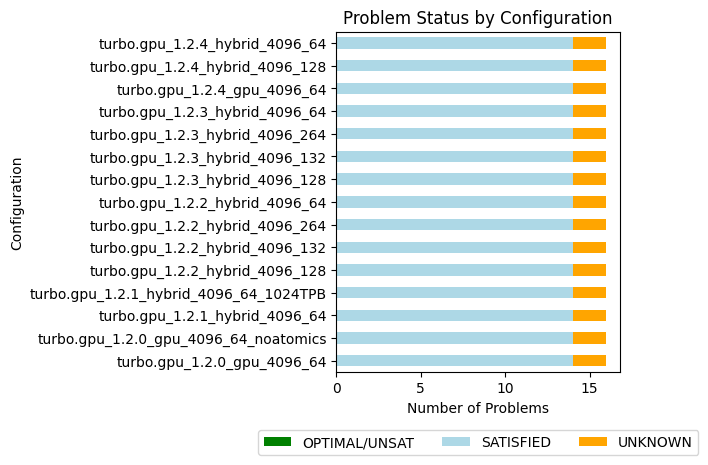

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
9,turbo.gpu.release_1.2.3_helios_300s_hybrid_4096_264,1.2.3,helios,turbo.gpu_1.2.3_hybrid_4096_264,45520.825650,15676.139568,0.0,0,360362.696626,116916.615228,0.0,0,20.166112,10.451429,0.0,16,8.818212,3.744472,0.0,16,49.2545,0.0,16,10.708,0,14,2,11,0,4.0
5,turbo.gpu.release_1.2.2_helios_300s_hybrid_4096_264,1.2.2,helios,turbo.gpu_1.2.2_hybrid_4096_264,40330.873097,9945.525254,0.0,0,258809.965449,78749.493515,0.0,0,18.383497,9.371562,0.0,16,0.000000,0.000000,0.0,16,0.0000,0.0,16,0.000,0,14,2,11,0,4.0
8,turbo.gpu.release_1.2.3_helios_300s_hybrid_4096_132,1.2.3,helios,turbo.gpu_1.2.3_hybrid_4096_132,36589.321148,11143.040631,0.0,0,245539.486341,93022.354411,0.0,0,20.962696,10.984302,0.0,16,8.818212,3.744472,0.0,16,49.2545,0.0,16,10.708,0,14,2,11,0,3.0
4,turbo.gpu.release_1.2.2_helios_300s_hybrid_4096_132,1.2.2,helios,turbo.gpu_1.2.2_hybrid_4096_132,33232.287084,7796.884830,0.0,0,184996.448678,69359.748278,0.0,0,19.111724,10.027083,0.0,16,0.000000,0.000000,0.0,16,0.0000,0.0,16,0.000,0,14,2,11,0,3.0
13,turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128,1.2.4,precision5820,turbo.gpu_1.2.4_hybrid_4096_128,21808.768268,6061.181053,0.0,0,845483.881750,143327.931122,0.0,0,40.448637,22.763712,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,1.0
10,turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_128,1.2.3,precision5820,turbo.gpu_1.2.3_hybrid_4096_128,18543.266493,4082.876687,0.0,0,129459.208989,48995.621710,0.0,0,17.003537,9.186541,0.0,16,8.818212,3.744472,0.0,16,49.2545,0.0,16,10.708,0,14,2,11,0,2.0
12,turbo.gpu.release_1.2.4_precision5820_300s_gpu_4096_64,1.2.4,precision5820,turbo.gpu_1.2.4_gpu_4096_64,14467.351633,5583.571230,0.0,0,510492.985364,136773.926255,0.0,0,40.471003,24.068860,0.0,16,1.025218,0.507413,0.0,16,402.9330,0.0,16,208.388,0,14,2,1,2,1.0
14,turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_64,1.2.4,precision5820,turbo.gpu_1.2.4_hybrid_4096_64,14208.154999,6213.232916,0.0,0,483481.358470,132540.628948,0.0,0,40.360399,23.134604,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,1.0
6,turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_128,1.2.2,precision5820,turbo.gpu_1.2.2_hybrid_4096_128,13475.409468,3029.655232,0.0,0,81399.981388,33540.007685,0.0,0,15.425417,9.202104,0.0,16,0.000000,0.000000,0.0,16,0.0000,0.0,16,0.000,0,14,2,11,0,2.0
11,turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_64,1.2.3,precision5820,turbo.gpu_1.2.3_hybrid_4096_64,11786.658650,3252.291633,0.0,0,81532.865551,43905.009612,0.0,0,18.595711,9.096627,0.0,16,8.818212,3.744472,0.0,16,49.2545,0.0,16,10.708,0,14,2,11,0,2.0


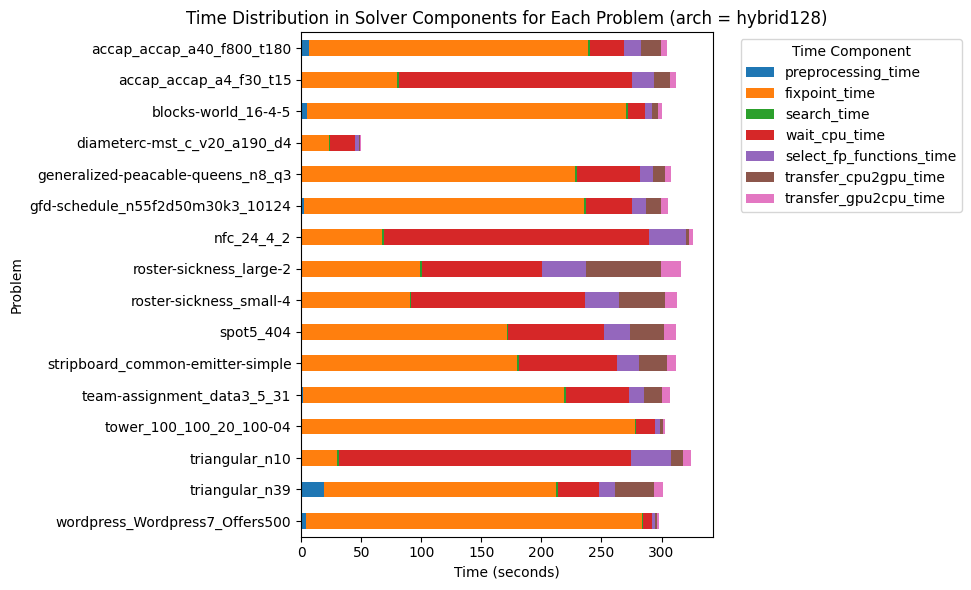

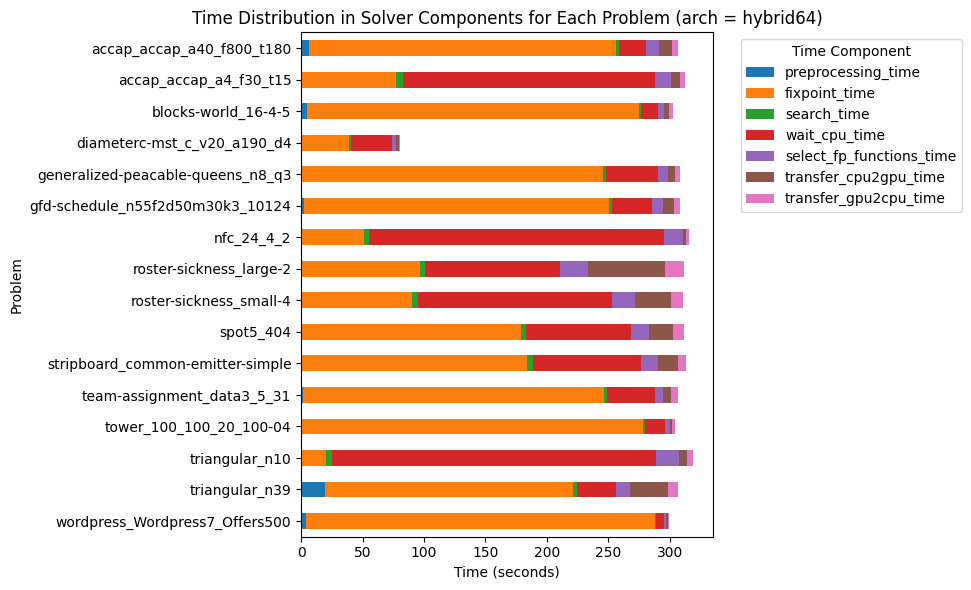

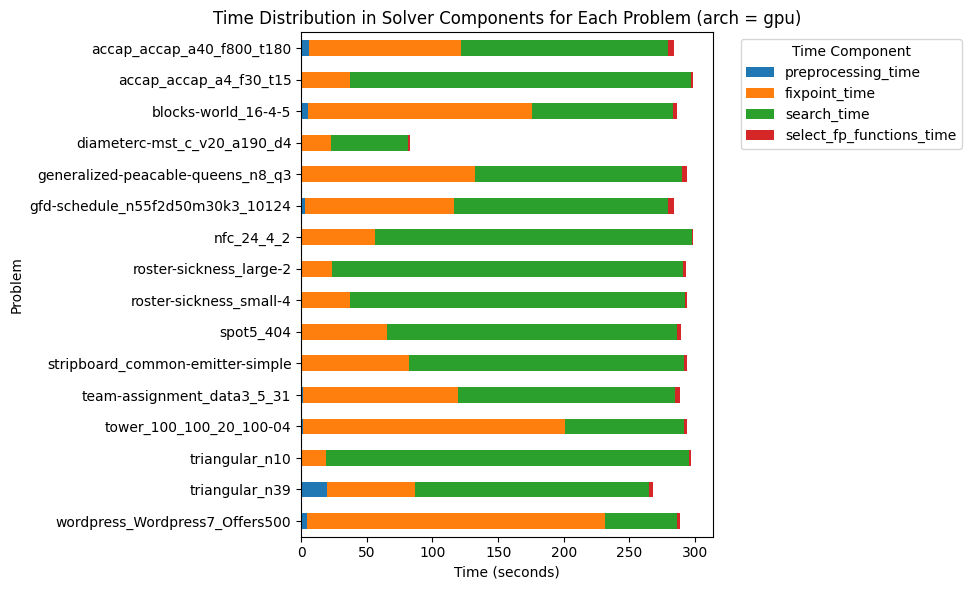

| Metrics | Normalized average [0,100] | Δ v1.2.0 | #best (_/16) | Average | Δ v1.2.0 | Median | Δ v1.2.0 |
|---------|----------------------------|----------|--------------|---------|----------|--------|----------|
| Nodes per second | 89.02 | +28% | 12 | 14467.35 | +24% | 5583.57 | +50% |
| Fixpoint iterations per second | 100.00 | +315% | 16 | 510492.99 | +586% | 136773.93 | +238% |
| Fixpoint iterations per node | 100.00 | +203% | 0 | 40.47 | +167% | 24.07 | +162% |
| Propagators memory | 19.91 | -80% | 15 | 1.03MB | -90% | 0.51MB | -89% |
| Variables store memory | 100.00 | +630% | 0 | 402.93KB | +715% | 208.39KB | +1813% |

| Metrics | Count | Δ v1.2.0 |
|---------|-------|----------|
| #Problems at optimality | 0 | 0 | 
| #Problems satisfiable | 14 | 14  |
| #Problems unknown | 2 | 2  |
| #Problem with store in shared memory | 1 | 10  |
| #Problem with prop in shared memory | 2 | 1  |
| #Problems with IDLE SMs at timeout | 1 | 2 |


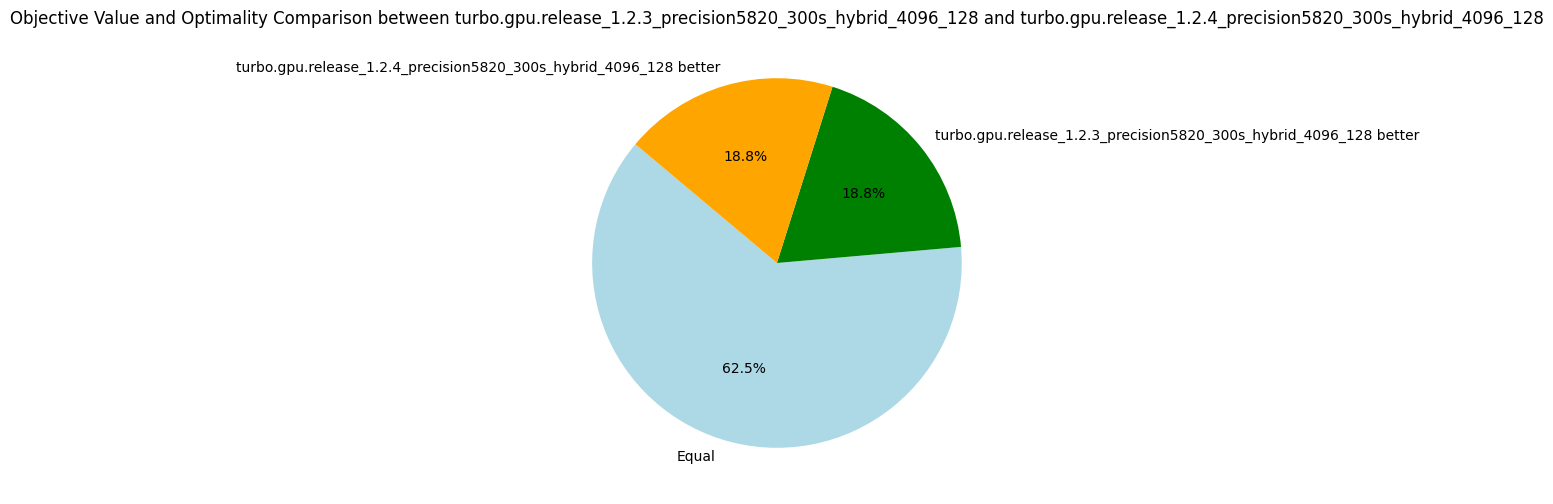

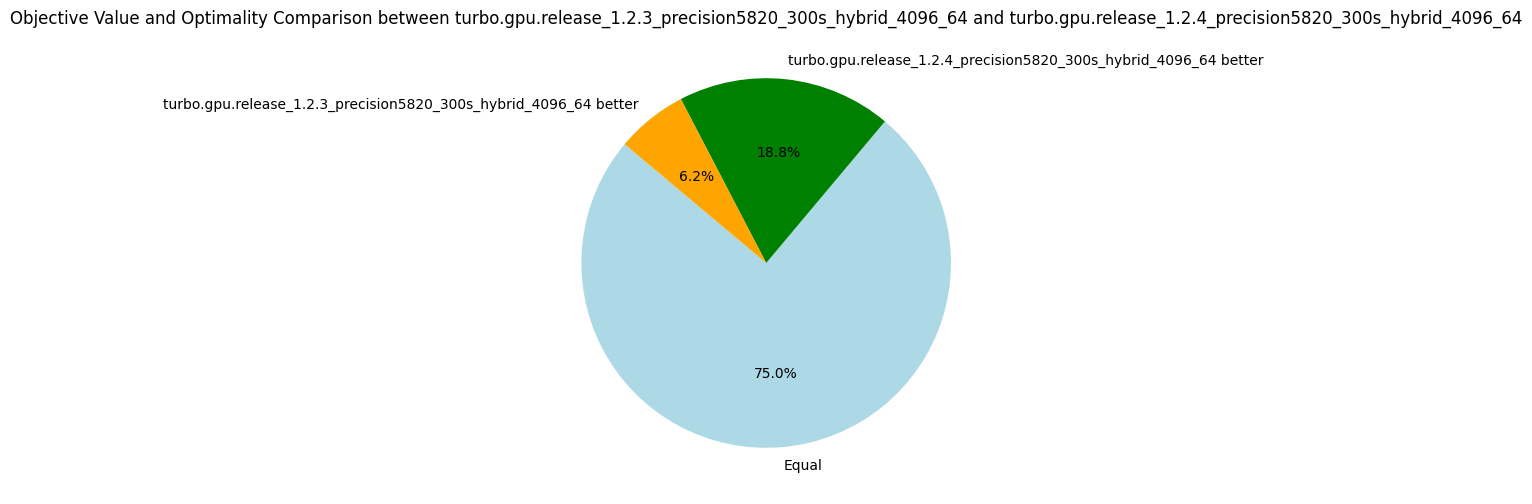

In [17]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.3.csv",
  "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv"
  # "../campaign/precision5820/turbo.cpu.release-v1.2.4.csv"
])
# df.to_csv("test.csv", index=False)
# df = df[~(df['problem'] == "rcpsp")]
# df = df[df['problem'] == "rcpsp"]

# Because globalmem was only benchmarked on problems that could fit in shared memory.
# But we don't want to remove the others for most of the analysis. (comment the line if you want to analyse the globalmem results)
df = df[df['uid'] != "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64_globalmem"]

df = analysis.intersect(df)

# analysis.show_problem_table(df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128"])

analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
# sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
# print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))

analysis.plot_time_distribution("hybrid128", df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128"])
analysis.plot_time_distribution("hybrid64", df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_64"])
analysis.plot_time_distribution("gpu", df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_gpu_4096_64"])

# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64", "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_64")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64", "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_128")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_64", "turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_64")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_128", "turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_128")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_64", "turbo.gpu.release_1.2.2_helios_300s_hybrid_4096_132")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.2_helios_300s_hybrid_4096_132", "turbo.gpu.release_1.2.2_helios_300s_hybrid_4096_264")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_64", "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_128")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.2_helios_300s_hybrid_4096_264", "turbo.gpu.release_1.2.3_helios_300s_hybrid_4096_264")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_64", "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_64")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_128", "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128")
# analysis.comparison_table_md(df, "turbo.cpu.release_1.2.0_precision5820_300s_cpu", "turbo.cpu.release_1.2.4_precision5820_300s_cpu")
analysis.comparison_table_md(df, "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64_noatomics", "turbo.gpu.release_1.2.4_precision5820_300s_gpu_4096_64")

# print(analysis.list_problem_where_leq(df, "nodes", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_1024"))

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_256")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256")
# print(p[p['Comparison'] == 'turbo.gpu.release_1.1.7_precision5820_300s_4096_64_256 better'])

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "com.google.ortools.sat_9.9_precision5820_300s")
# print(p[p['Comparison'] == 'turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256 better'])
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64", "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_64")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64", "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_128")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.2_precision5820_300s_hybrid_4096_64", "turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_64")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64", "turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_128")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.2_helios_300s_hybrid_4096_132", "turbo.gpu.release_1.2.2_helios_300s_hybrid_4096_264")
# _ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.2_helios_300s_hybrid_4096_264", "turbo.gpu.release_1.2.3_helios_300s_hybrid_4096_264")
_ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_128", "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128")
_ = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_64", "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_64")


# df[(df['uid'] == "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256") & (df['memory_configuration'] != "global") & (df['eps_num_subproblems'] == 4096)]
# df[(df['mzn_solver'] == "turbo.gpu.release") & (df['problem'] == "nfc") & (df['eps_num_subproblems'] == 4096)]